Nome: Gabriel Meirelles Carvalho Orlando

RA: 790728


Link para o arquivo csv: https://drive.google.com/file/d/1y8lD6159LWu_-X6uSyueM8KGIaMTzlR7/view?usp=sharing

In [47]:
#Bibliotecas importadas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [48]:
#Conjunto de dados importado
df = pd.read_csv("Dry_Bean_Dataset.csv",header=0)

In [49]:
#Cabeçalho do conjunto de dados
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [50]:
#Quantas classes o conjunto de dados tem
len(pd.unique(df['Class']))

7

In [51]:
#Preparar para a retirada do vetor de classes
columns = df.columns

In [52]:
#Vetor de classes retirado, visto que se trata de aprendizado não supervisionado
cluster_df = df[columns[0:-1]]

In [53]:
#Cabeçalho do novo conjunto de dados, sem o vetor de classes
cluster_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [54]:
#Normalização dos atributos contínuos
mms = MinMaxScaler()
mms.fit(cluster_df)
df_transformed = mms.transform(cluster_df)

In [55]:
df_transformed.shape

(13611, 16)

In [56]:
#Realiza o agruamento e adiciona cada indice da soma das distancias quadradas na lista
soma_distancias_quadradas = list()
lim_inf = 2
lim_sup = 15
for i in range(lim_inf, lim_sup+1):
  km = KMeans(n_clusters=i)
  km = km.fit(df_transformed)
  soma_distancias_quadradas.append(km.inertia_)


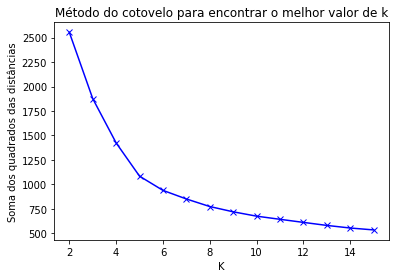

In [57]:
#Plota o gráfico da soma das distancias quadrados x o valor de k
plt.plot(range(lim_inf,lim_sup+1),soma_distancias_quadradas,'bx-')
plt.xlabel('K')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do cotovelo para encontrar o melhor valor de k')
plt.show()

In [58]:
#Importa a biblioteca numpy
import numpy as np

In [59]:
desvio = np.array(soma_distancias_quadradas)

In [60]:
#Média e desvio padrão das somas das distâncias quadradadas de cada agrupamento
print(f'Desvio padrao: {desvio.std()}')
print(f'Média: {desvio.mean()}')

Desvio padrao: 566.5742591993512
Média: 988.1478770180771


Esse passo não era necessário, mas isto foi feito para mostrar que com a mudança dos valores de k, há um grande desvio no valor da somas das distâncias quadradas

In [ ]:
for i in range(0,lim_sup-lim_inf):
  diferenca= abs(soma_distancias_quadradas[i] - soma_distancias_quadradas[i+1])
  if(diferenca < 100):
    print(f"Diferença entre {i+2} e {i+3} eh: {diferenca:.2f}")
    break


Diferença entre 6 e 7 eh: 87.72


O Método do cotovelo para a avaliação do número k de grupos, baseia sua avaliação no ponto em que não há tanta melhora no índice das somas quadraticas. Nessa implementação essa melhora mínima para se decicidir o cotovelo foi de 100 unidades. Com a visualização do gráfico pode-se perceber que em k = 6, o gráifco realmente faz o formato de um cotovelo, e apartir deste ponto do eixo x, não há tanto diminuição da soma, tento em vista que o máximo é acima de 673, visto que 87 unidades é relativamente baixo. Além da visualização gráfica, que não pode ser a única forma de conclusão, há a subtração dos indices em sequência, demonstrando que a partir de k = 6, a diminuição do valor do indice é abaixo de 100 unidades.

Dessa forma, o melhor valor de k para este conjunto de dados, utilizando o algoritmo KMeans, e se baseando na avaliação pela soma dos quadrados é k = 6. Nesse caso k=6 é o ponto de inflexão do gráfico

In [63]:
for i in range(0,14):
  print(f'{soma_distancias_quadradas[i]:.2f}')

2554.23
1877.16
1424.56
1084.73
939.66
851.93
774.69
720.75
676.30
644.24
612.72
581.87
555.32
535.91
